In [1]:
#------------------------------------------------------------------
#IMPOTACION DE LIBRERIAS PARA EL DESARROLLO DE LA ACTIVIDAD 
#------------------------------------------------------------------


import pandas as pd #cumple con la funcion de manipular y analizar datos:cargar/mostrar/eliminar nulos

import numpy as np #cumple con la funcion de trabajar listas y operaciones matematcas como el calculo de metricas de error

import matplotlib.pyplot as plt #representa los datos de manera grafica 

import seaborn as sns #mejora la apariencia de los graficos ,de manera mas detallada y estilizada 


#libreria de maching learning
from sklearn.model_selection import train_test_split #divide los datos entre los conjuntos de entrenamiento y prueba

from sklearn.preprocessing import OneHotEncoder, StandardScaler
#'OneHotEncoder'el primer parametro convierte en categorias (marca ,modelo)en numero 
#'StandardScaler'el segundo prarametro normaliza los datos para mejorar la precision del modelo

from sklearn.ensemble import RandomForestRegressor#modelo basado en arboles de desicion,se usa para predecir valores numericos 'regresion'

from sklearn.metrics import mean_absolute_error,mean_squared_error
#calculo de errores y sus raices cuadradas /mide su desviacion/pealiza errores/

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#------------------------------------------------------------------
#ANALISIS EXPLORATORIO DE DATOS 
#------------------------------------------------------------------


#cargar archivos,esto se hace con la libreria pandas'pd'
dt = pd.read_csv(r"car data.csv")
print(dt.head())
#cambio del nombre de las variables a español
dt.rename(columns={
    'Car_Name': 'Nombre_Carro',
    'Year': 'Año',
    'Selling_Price': 'Precio_Venta',
    'Present_Price': 'Precio_Actual',
    'Kms_Driven': 'Kms_Recorridos',
    'Fuel_Type': 'Tipo_Combustible',
    'Seller_Type': 'Tipo_Vendedor',
    'Transmission': 'Transmision',
    'Owner': 'Numero_Dueños'
}, inplace=True)

print(dt.head())





  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
  Nombre_Carro   Año  Precio_Venta  Precio_Actual  Kms_Recorridos  \
0         ritz  2014          3.35           5.59           27000   
1          sx4  2013          4.75           9.54           43000   
2         ciaz  2017          7.25           9.85            6900   
3      wagon r  2011          2.85           4.15            5200   
4     

In [3]:
#visualiacion de columnas y datatype
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nombre_Carro      301 non-null    object 
 1   Año               301 non-null    int64  
 2   Precio_Venta      301 non-null    float64
 3   Precio_Actual     301 non-null    float64
 4   Kms_Recorridos    301 non-null    int64  
 5   Tipo_Combustible  301 non-null    object 
 6   Tipo_Vendedor     301 non-null    object 
 7   Transmision       301 non-null    object 
 8   Numero_Dueños     301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#estadisticas del dataset
dt.describe()

,Año,Precio_Venta,Precio_Actual,Kms_Recorridos,Numero_Dueños
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
dt.isnull().sum()

Nombre_Carro        0
Año                 0
Precio_Venta        0
Precio_Actual       0
Kms_Recorridos      0
Tipo_Combustible    0
Tipo_Vendedor       0
Transmision         0
Numero_Dueños       0
dtype: int64

In [11]:
dt.duplicated().sum()

2

In [13]:
#------------------------------------------------------------------
#OUTLIERS / VALORES ATÍPICOS
#------------------------------------------------------------------

Q1 = dt['Kms_Recorridos'].quantile(0.25)
Q3 = dt['Kms_Recorridos'].quantile(0.75)

IQR = Q3 - Q1

outliers = dt[(dt['Kms_Recorridos'] < Q1 - 1.5 * IQR) | (dt['Kms_Recorridos'] > Q3 + 1.5 * IQR)]

print(outliers[['Nombre_Carro', 'Kms_Recorridos']])

      Nombre_Carro  Kms_Recorridos
37             800          127000
50        fortuner          104707
53        fortuner          135000
77         corolla          135154
84          innova          197176
85           camry          142000
179  Honda Karizma          213000
196      Activa 3g          500000


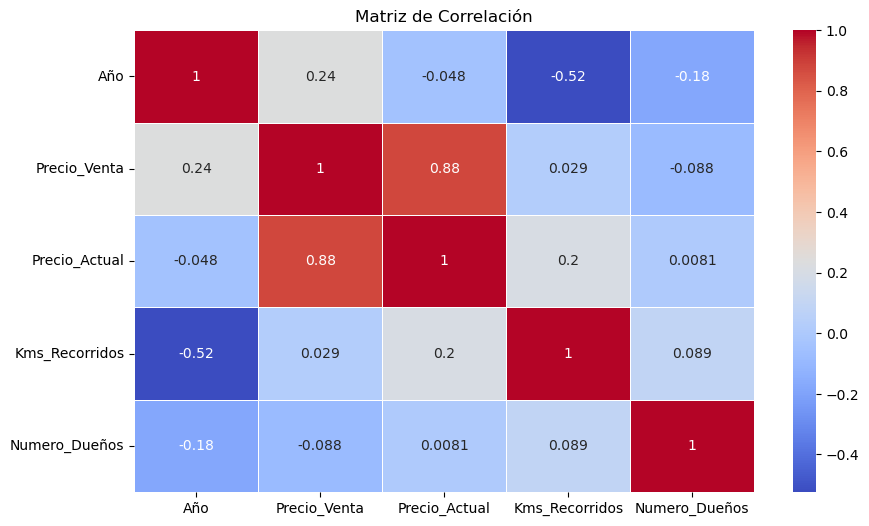

In [15]:
#------------------------------------------
#Correlación: sns.heatmap(), sns.pairplot()
#------------------------------------------

# Matriz de correlación
correlation_matrix = dt.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [17]:
#hay una fuerte corelacion entre el precio de venta  y el precio actual olos que nos indica que ya usados aun cuentan con con un precio alto 
#una correlacion negativa moderada entre año y km recorridos , esto indica que los autos mas viejos tienen a tener mas km recorridos
#el año y el precio actual no cuentan con una correlacion clara ,un indice de que el año no aafecta el precio actual
#Muy poca o ninguna correlación numero de duenos y otros . El número de dueños no afecta mucho el precio ni los kilómetros.
#Correlación baja. A veces los autos más usados todavía mantienen cierto valor.
#Ligeramente positivo. Los autos más nuevos pueden haber tenido un precio de venta más alto.

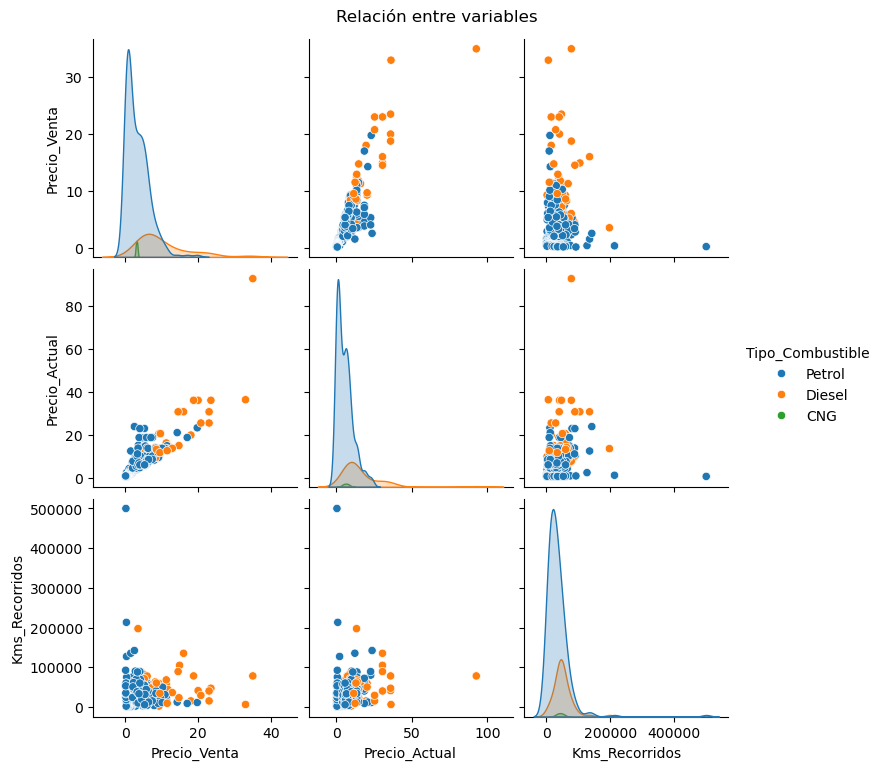

In [19]:
sns.pairplot(dt, vars=['Precio_Venta', 'Precio_Actual', 'Kms_Recorridos'], hue='Tipo_Combustible')
plt.suptitle('Relación entre variables', y=1.02)
plt.show()

In [20]:
#. Precio_Venta vs Precio_Actual
#Se observa una fuerte relación positiva (cuando uno sube, el otro también).

#Los puntos se agrupan en una línea ascendente, especialmente para autos con combustible Diesel y Petrol.

#Algunos autos Diesel tienen valores altos de ambos precios → podrían ser vehículos más nuevos o de gama alta.




#.Precio vs Kms_Recorridos

#Hay una dispersión más amplia, especialmente en Kms_Recorridos, lo cual sugiere que no hay una relación directa fuerte entre precio y kilometraje.



#Distribuciones individuales (diagonales del gráfico)
#La mayoría de autos son de tipo Petrol (muchas curvas en azul).

#El Precio_Venta y Precio_Actual están más concentrados en valores bajos.

#Kms_Recorridos muestra una cola larga a la derecha (hay unos pocos autos con kilometraje muy alto, lo que podrían ser outliers).


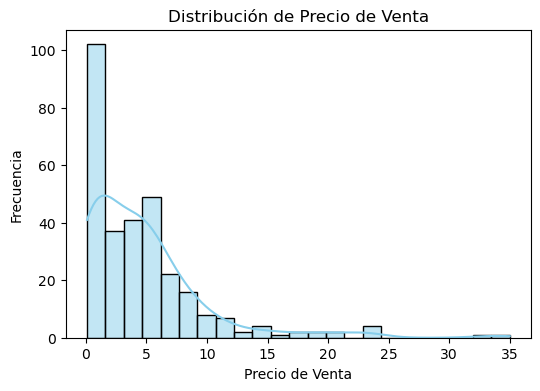

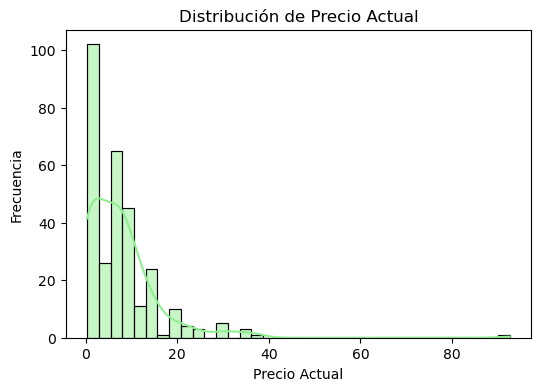

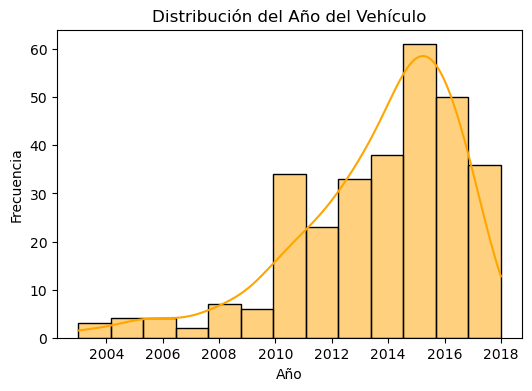

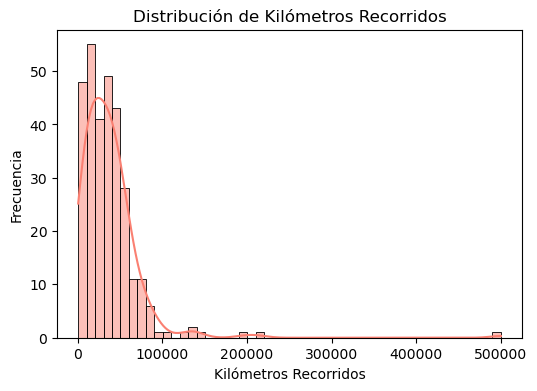

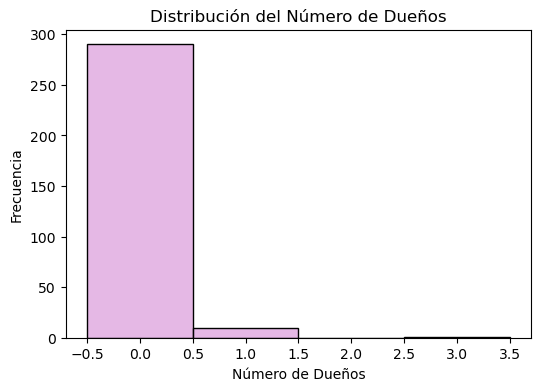

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Precio_Venta
plt.figure(figsize=(6,4))
sns.histplot(dt['Precio_Venta'], kde=True, color='skyblue')
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Precio_Actual
plt.figure(figsize=(6,4))
sns.histplot(dt['Precio_Actual'], kde=True, color='lightgreen')
plt.title('Distribución de Precio Actual')
plt.xlabel('Precio Actual')
plt.ylabel('Frecuencia')
plt.show()

# Año
plt.figure(figsize=(6,4))
sns.histplot(dt['Año'], kde=True, color='orange')
plt.title('Distribución del Año del Vehículo')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Kms_Recorridos
plt.figure(figsize=(6,4))
sns.histplot(dt['Kms_Recorridos'], kde=True, color='salmon')
plt.title('Distribución de Kilómetros Recorridos')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Frecuencia')
plt.show()

# Numero_Dueños
plt.figure(figsize=(6,4))
sns.histplot(dt['Numero_Dueños'], kde=False, discrete=True, color='plum')
plt.title('Distribución del Número de Dueños')
plt.xlabel('Número de Dueños')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
# Análisis de la distribución del Precio de Venta
# El histograma muestra una clara asimetría positiva: la mayoría de los autos se vendieron a un precio bajo (entre 0 y 5),
# mientras que unos pocos se vendieron a precios mucho más altos (mayores a 20). Estos valores extremos podrían ser outliers
# o autos premium. Este comportamiento sugiere que el mercado está dominado por vehículos económicos.

# Análisis de la distribución del Precio Actual
# Similar al Precio de Venta, esta variable presenta una fuerte asimetría positiva.
# La mayoría de los autos tienen un valor actual bajo (entre 0 y 10), aunque algunos superan los 50 o incluso los 80.
# Esto indica una fuerte depreciación en la mayoría de los vehículos, y podría valer la pena aplicar una transformación logarítmica
# si se desea estabilizar la varianza para algún modelo de regresión.

# Análisis de la distribución del Año del Vehículo
# Esta variable muestra una asimetría negativa, con un gran número de autos fabricados entre 2012 y 2017.
# Hay pocos vehículos antiguos (anteriores a 2007), lo que indica que el dataset se concentra en autos relativamente recientes.
# Este patrón sugiere una tendencia hacia autos modernos, que probablemente influyen positivamente en el valor de reventa.

# Análisis de la distribución de los Kilómetros Recorridos
# La distribución es altamente asimétrica hacia la derecha.
# La mayoría de los autos han recorrido menos de 100,000 km, aunque hay algunos casos extremos que superan los 400,000 km.
# Estos valores podrían representar autos muy antiguos o taxis, y deben analizarse cuidadosamente como posibles outliers.
# Una transformación logarítmica también puede ayudar en este caso si se utiliza en un modelo predictivo.


In [23]:
#-------------------------
#Preprocesamiento de Datos
#-------------------------

In [26]:
print("duplicados antes de eliminar:",dt.duplicated().sum())
#eliminar 
dt = dt.drop_duplicates()
#verificar eliminacion
print("Duplicados despues de eliminar",dt.duplicated().sum())

duplicados antes de eliminar: 2
Duplicados despues de eliminar 0


In [31]:
print("datos nullos antes ",dt.isnull().sum)

dt = dt.dropna()

print("datos  nullos ahora:",dt.isnull().sum())

datos nullos antes  <bound method DataFrame.sum of      Nombre_Carro    Año  Precio_Venta  Precio_Actual  Kms_Recorridos  \
0           False  False         False          False           False   
1           False  False         False          False           False   
2           False  False         False          False           False   
3           False  False         False          False           False   
4           False  False         False          False           False   
..            ...    ...           ...            ...             ...   
296         False  False         False          False           False   
297         False  False         False          False           False   
298         False  False         False          False           False   
299         False  False         False          False           False   
300         False  False         False          False           False   

     Tipo_Combustible  Tipo_Vendedor  Transmision  Numero_Dueños  
0    

In [33]:
# Codificar variables categóricas


print(dt.columns.tolist())

dt_enfo = pd.get_dummies(dt, columns=['Tipo_Combustible', 'Tipo_Vendedor', 'Transmision'], drop_first=True)

dt_enfo.head()

['Nombre_Carro', 'Año', 'Precio_Venta', 'Precio_Actual', 'Kms_Recorridos', 'Tipo_Combustible', 'Tipo_Vendedor', 'Transmision', 'Numero_Dueños']


,Nombre_Carro,Año,Precio_Venta,Precio_Actual,Kms_Recorridos,Numero_Dueños,Tipo_Combustible_Diesel,Tipo_Combustible_Petrol,Tipo_Vendedor_Individual,Transmision_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


In [35]:
# Seleccionar características con mejor correlación
features = ['Precio_Venta', 'Kms_Recorridos'] + \
    [col for col in dt_enfo.columns if col.startswith('Tipo_Combustible_') or 
     col.startswith('Tipo_Vendedor_') or col.startswith('Transmision_')]
target = 'Precio_Actual'

X = dt_enfo[features]
y = dt_enfo[target]

In [37]:
#  Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#  Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [49]:
# Evaluar el modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# Para el RMSE, usa root_mean_squared_error
from sklearn.metrics import root_mean_squared_error
y_pred = modelo.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))  
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.994321433321113
RMSE: 5.812999054024185
R² Score: 0.38152268068271544


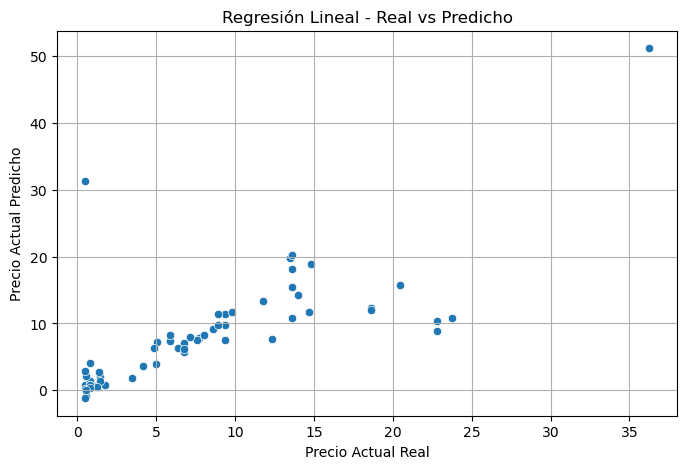

In [51]:
# Visualización: Real vs Predicho

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio Actual Real")
plt.ylabel("Precio Actual Predicho")
plt.title("Regresión Lineal - Real vs Predicho")
plt.grid()
plt.show()